# Linear Regression from a Neural Networks Perspective

In [1]:
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import numpy as np

## Prepare Data

In [3]:
boston = load_boston()

In [4]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [5]:
boston.data.shape

(506, 13)

In [6]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
boston.target[0]

24.0

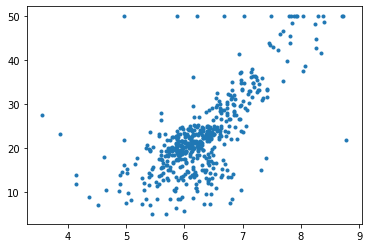

In [8]:
plt.plot(boston.data[:,5], boston.target, '.')

# Generate Training and Test sets

In [9]:
m = boston.data.shape[0]
m

506

In [10]:
test_indices = np.random.choice(m, 100, replace=False)
test_indices

array([255, 460, 279, 256, 221, 233,  85, 217, 155, 504, 326, 118, 383,
       395, 238, 188, 466, 157, 453, 227,   4, 116, 445, 481,  72, 405,
       161, 204, 451, 250, 437,  36, 147,  37, 488, 430, 475, 137,  99,
       184, 474, 369, 442, 493, 361, 320, 338, 485, 149, 234,  32, 131,
       162, 353, 136, 443, 293, 236, 224, 417, 402,   0, 456, 229, 193,
       467,  45, 382,  74, 423, 409,  91, 153, 341,  70,  62,  51, 334,
        42, 142, 119,  86, 101, 249, 140,  94, 170,  77, 470, 265, 327,
       414, 350, 122, 461, 297,  39, 154, 495, 242])

In [11]:
all_indices = np.arange(m)

In [12]:
train_indices = np.setdiff1d(all_indices, test_indices)

In [13]:
train_set_x = boston.data[train_indices, 5]

In [14]:
train_set_x.shape

(406,)

In [15]:
train_set_x = train_set_x.reshape(-1, 1)
train_set_x.shape

(406, 1)

In [16]:
train_set_y = boston.target[train_indices].reshape(-1, 1)

In [17]:
test_set_x = boston.data[test_indices, 5].reshape(-1, 1)

In [18]:
test_set_y = boston.target[test_indices].reshape(-1, 1)

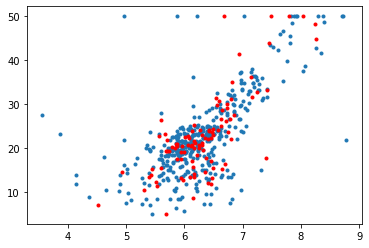

In [19]:
plt.plot(train_set_x, train_set_y, '.')
plt.plot(test_set_x, test_set_y, '.', color='red')

## Linear Regression with Gradient Descent

In [20]:
def initialize_parameters():
    w = 0
    b = 0
    return w, b

In [21]:
def propagate(w, b, x, y):
    # Compute cost and gradient.
    m = x.shape[0]
    # "Forward propagation" to compute "a" and "cost"
    a = w * x + b
    cost = np.sum(1/2 * (y - a)**2)
    
    # "Backward propagation" to compute gradient
    dw = np.sum((a-y) * x)
    db = np.sum(a - y)
    
    gradients = {'dw': dw,
                'db' : db }
    
    return gradients, cost

In [22]:
def optimize(w, b, x, y, num_iter, alpha):
    costs = []
    
    for i in range(num_iter):
        grads, cost = propagate(w, b, x, y)
        
        w = w - alpha * grads['dw']
        b = b - alpha * grads['db']
        
        if i % 100 == 0:
            costs.append(cost)
        
    params = {'w': w, 
             'b': b}
    
    return params, grads, costs

In [23]:
def predict(w, b, x):
    a = (w*x) + b
    return a

In [24]:
def model(x_train, y_train, x_test, y_test, num_iter, alpha):
    m = x_train.shape[0]
    w, b = initialize_parameters()
    params, grads, costs = optimize(w, b, x_train, y_train, num_iter, alpha)
    
    train_predictions = predict(params['w'], params['b'], x_train)
    test_predictions = predict(params['w'], params['b'], x_test)
    
    print('training error: ', np.mean(np.abs(train_predictions - y_train)))
    print('test error: ', np.mean(np.abs(test_predictions - y_test)))
    
    return params, costs
    

In [25]:
params, costs = model(train_set_x, train_set_y, test_set_x, test_set_y, 10000, 0.0001)

training error:  4.482719832612465
test error:  4.439082714794045


In [26]:
params

{'w': 8.628070957857297, 'b': -31.665579315410188}

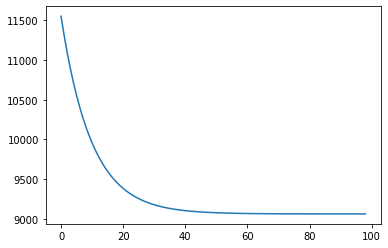

In [27]:
plt.plot(costs[1:])

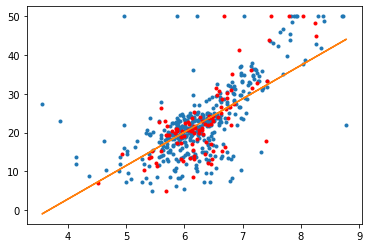

In [28]:
predictions = params['w'] * train_set_x + params['b']
plt.plot(train_set_x, train_set_y, '.')
plt.plot(test_set_x, test_set_y, '.', color='red')
plt.plot(train_set_x, predictions, '-')

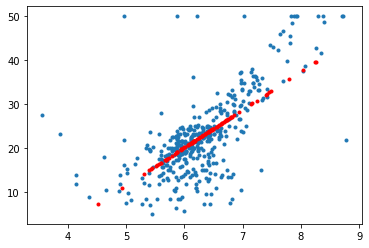

In [29]:
predictions = params['w'] * test_set_x + params['b']
plt.plot(train_set_x, train_set_y, '.')
plt.plot(test_set_x, predictions, '.', color='red')


## Least Squares Solution

In [30]:
train_set_x.shape

(406, 1)

In [31]:
ones = np.ones(train_set_x.shape)

In [32]:
ones.shape

(406, 1)

In [33]:
A = np.hstack([ones, train_set_x])

In [34]:
A.shape

(406, 2)

In [35]:
train_set_y.shape

(406, 1)

In [36]:
b, w = np.linalg.solve(np.dot(A.T, A), np.dot(A.T, train_set_y))

In [37]:
b

array([-31.85934081])

In [38]:
w

array([8.65856289])

In [39]:
b.squeeze()

array(-31.85934081)

In [40]:
float(b.squeeze())

-31.859340807768213

## If you are too lazy to set up A, use Polyfit

In [41]:
train_set_x.shape

(406, 1)

In [42]:
w, b = np.polyfit(train_set_x.reshape(-1), train_set_y, 1)

In [43]:
w

array([8.65856289])

In [44]:
b

array([-31.85934081])

In [45]:
a = np.polyfit(train_set_x.reshape(-1), train_set_y, 100)

C:\tools\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


## Overfitting

In [46]:
import pandas as pd
s = pd.read_csv('data/springData.csv')

In [47]:
s.head()

,Distance (m),Mass (kg)
0,0.0865,0.10
1,0.1015,0.15
2,0.1106,0.20
3,0.1279,0.25
4,0.1892,0.30


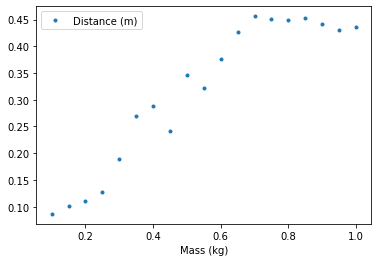

In [48]:
s.plot(x='Mass (kg)', y='Distance (m)', style='.')

In [49]:
a_1_1, a_0_1 = np.polyfit(s['Mass (kg)'], s['Distance (m)'], 1)

In [50]:
a_1_1

0.45549824561403496

In [51]:
a_0_1

0.06562859649122811

In [52]:
s['Linear'] = a_0_1 + a_1_1 * s['Mass (kg)']

In [53]:
s.head()

,Distance (m),Mass (kg),Linear
0,0.0865,0.10,0.111178
1,0.1015,0.15,0.133953
2,0.1106,0.20,0.156728
3,0.1279,0.25,0.179503
4,0.1892,0.30,0.202278


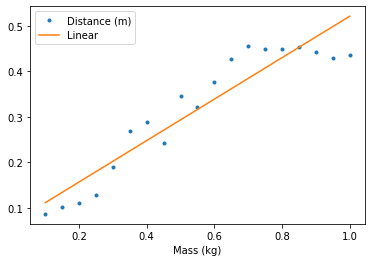

In [54]:
myPlot = s.plot(x='Mass (kg)', y='Distance (m)', style='.')
s.plot(x='Mass (kg)', y='Linear', ax = myPlot)

In [55]:
a_2_2, a_1_2, a_0_2 = np.polyfit(s['Mass (kg)'], s['Distance (m)'], 2)

In [56]:
s['Quadratic'] = a_0_2 + a_1_2 * s['Mass (kg)'] + a_2_2 * s['Mass (kg)']**2   

In [57]:
s.head()

,Distance (m),Mass (kg),Linear,Quadratic
0,0.0865,0.10,0.111178,0.042827
1,0.1015,0.15,0.133953,0.088386
2,0.1106,0.20,0.156728,0.131264
3,0.1279,0.25,0.179503,0.171462
4,0.1892,0.30,0.202278,0.208979


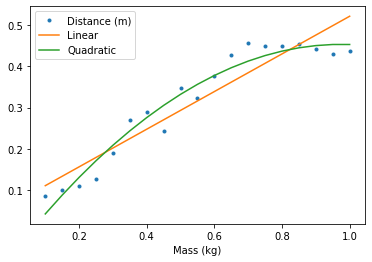

In [58]:
myPlot = s.plot(x='Mass (kg)', y='Distance (m)', style='.')
s.plot(x='Mass (kg)', y='Linear', ax = myPlot)
s.plot(x='Mass (kg)', y='Quadratic', ax = myPlot)

In [59]:
a_3_3, a_2_3, a_1_3, a_0_3 = np.polyfit(s['Mass (kg)'], s['Distance (m)'], 3)

In [60]:
s['Cubic'] = a_0_3 + a_1_3 * s['Mass (kg)'] + a_2_3 * s['Mass (kg)']**2 + a_3_3 * s['Mass (kg)']**3 

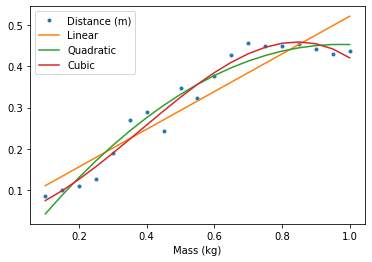

In [61]:
myPlot = s.plot(x='Mass (kg)', y='Distance (m)', style='.')
s.plot(x='Mass (kg)', y='Linear', ax = myPlot)
s.plot(x='Mass (kg)', y='Quadratic', ax = myPlot)
s.plot(x='Mass (kg)', y='Cubic', ax = myPlot)

Be careful when predicting values outside of the range for which you had training data. What spring length does the model predict for a mass of 2 kg?

In [62]:
a_0_3 + a_1_3 * 2 + a_2_3 * 2**2 + a_3_3 * 2**3 

-3.1214316995697793

In [63]:
params_20 = np.polyfit(s['Mass (kg)'], s['Distance (m)'], 20)

C:\tools\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In [64]:
params_20

array([-2.03250540e+09,  1.35597478e+10, -3.68751735e+10,  4.79929076e+10,
       -1.80969304e+10, -2.88327025e+10,  3.31998645e+10,  8.90537049e+09,
       -3.65452480e+10,  1.57243909e+10,  2.24964660e+10, -3.88168600e+10,
        3.03705601e+10, -1.52925662e+10,  5.38425230e+09, -1.35782528e+09,
        2.44486863e+08, -3.06476562e+07,  2.53327294e+06, -1.23561811e+05,
        2.67850504e+03])

In [65]:
s['Deg20'] = np.polyval(params_20, s['Mass (kg)'])

In [66]:
s.head()

,Distance (m),Mass (kg),Linear,Quadratic,Cubic,Deg20
0,0.0865,0.10,0.111178,0.042827,0.075116,0.086499
1,0.1015,0.15,0.133953,0.088386,0.099149,0.101527
2,0.1106,0.20,0.156728,0.131264,0.126832,0.110464
3,0.1279,0.25,0.179503,0.171462,0.157375,0.128594
4,0.1892,0.30,0.202278,0.208979,0.189986,0.186887


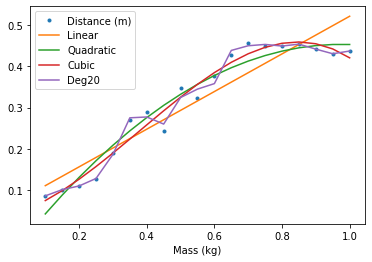

In [67]:
myPlot = s.plot(x='Mass (kg)', y='Distance (m)', style='.')
s.plot(x='Mass (kg)', y='Linear', ax = myPlot)
s.plot(x='Mass (kg)', y='Quadratic', ax = myPlot)
s.plot(x='Mass (kg)', y='Cubic', ax = myPlot)
s.plot(x='Mass (kg)', y='Deg20', ax = myPlot)

In this plot, the 20th degree model looks like a very good model on the training data. But what does the model predict for new data, even if it is within the range for which we had training data?

In [68]:
masses = np.arange(0.1, 1.0, 0.001)

In [69]:
length = np.polyval(params_20, masses)

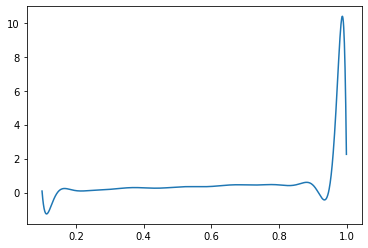

In [70]:
plt.plot(masses, length)